<div style="display: flex; align-items: center;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Parcial Final</font></b></h1>
                <h3><font color='0B5345'>Luisa Fernanda Enciso</font></h3>
    </div>
</div>

1. Construya la señal z(t) = x(t) + y(t) usando señales básicas

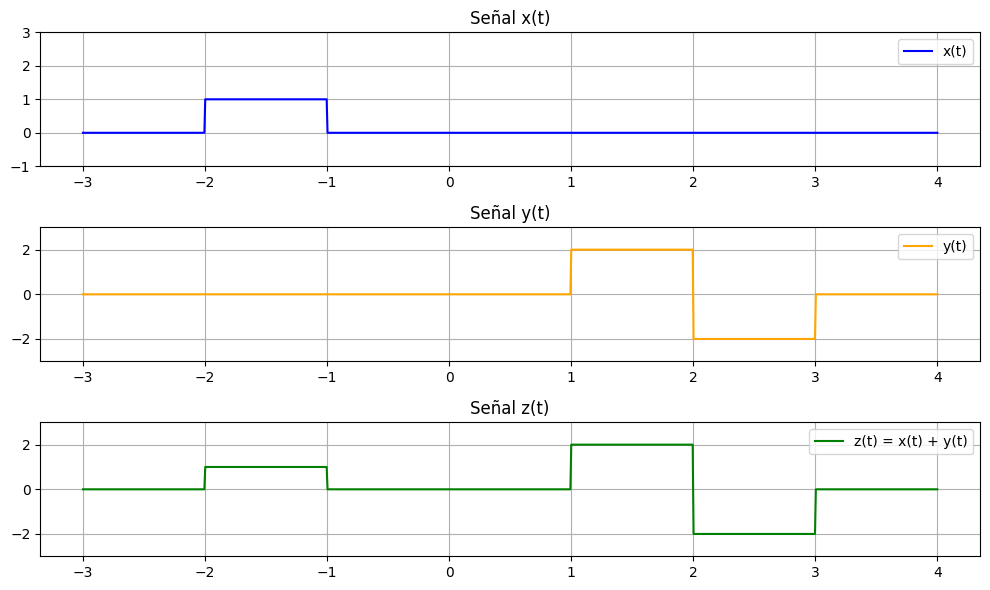

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal escalón unitario
def u(t):
    return np.where(t >= 0, 1, 0)

# Definir x(t) y y(t)
def x(t):
    return u(t + 2) - u(t + 1)

def y(t):
    return 2 * (u(t - 1) - u(t - 2)) - 2 * (u(t - 2) - u(t - 3))

# Definir z(t) = x(t) + y(t)
def z(t):
    return x(t) + y(t)

# Crear el eje de tiempo
t = np.linspace(-3, 4, 1000)  

# Calcular las señales
x_t = x(t)
y_t = y(t)
z_t = z(t)

# Graficar las señales
plt.figure(figsize=(10, 6))

# Gráfica de x(t)
plt.subplot(3, 1, 1)
plt.plot(t, x_t, label="x(t)", color="blue")
plt.title("Señal x(t)")
plt.grid()
plt.ylim([-1, 3])
plt.legend()

# Gráfica de y(t)
plt.subplot(3, 1, 2)
plt.plot(t, y_t, label="y(t)", color="orange")
plt.title("Señal y(t)")
plt.grid()
plt.ylim([-3, 3])
plt.legend()

# Gráfica de z(t)
plt.subplot(3, 1, 3)
plt.plot(t, z_t, label="z(t) = x(t) + y(t)", color="green")
plt.title("Señal z(t)")
plt.grid()
plt.ylim([-3, 3])
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


2. Grafique w(t) = z(t)*r(2(t + k) - 6) Con k = 2(a+1) con a = último número de la cédula (10%)

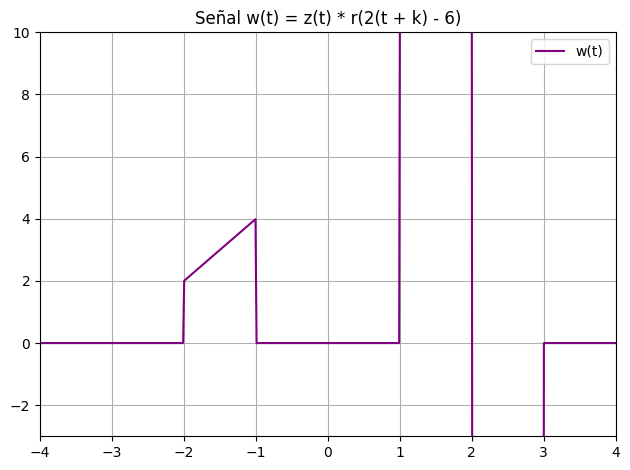

In [3]:
# Parámetro k
a = 2
k = 2 * (a + 1)  

def r(t):
    return np.maximum(0, t)

# Señal w(t)
def w(t):
    return z(t) * r(2 * (t + k) - 6)

# Eje de tiempo
t = np.linspace(-10, 5, 1000)  # Desde -10 hasta 5 con 1000 puntos

# Calcular las señales
z_t = z(t)
w_t = w(t)

# Graficar las señales
plt.plot(t, w_t, label="w(t)", color="purple")
plt.title("Señal w(t) = z(t) * r(2(t + k) - 6)")
plt.grid()
plt.ylim([-3, 10])
plt.xlim([-4,4])
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


4. Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10 segundos de la señal usando Colab

    x(t)= 4 ∗sen(40πt + (π /4))+ k ∗ cos(80πt)+ 5 Con k = 2(a+1) con a = 2

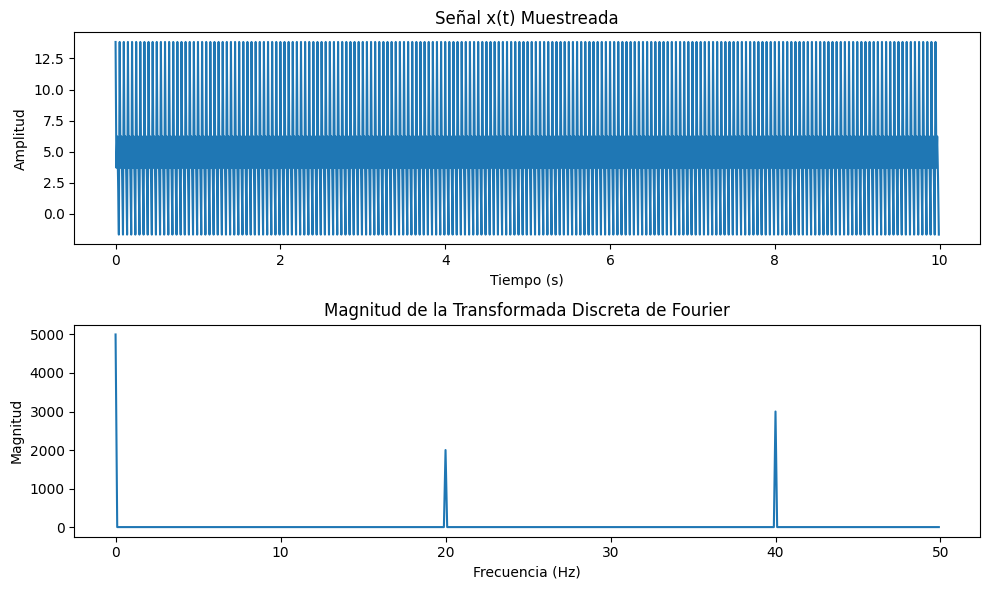

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 2  # Valor dado
k = 2 * (a + 1)  # Cálculo de k
Fs = 100  # Frecuencia de muestreo en Hz
T = 10  # Duración de la señal en segundos
t = np.arange(0, T, 1/Fs)  # Tiempo para 10 segundos
N = len(t)  # Número de muestras

# Definir la señal continua
x_t = 4 * np.sin(40 * np.pi * t + np.pi / 4) + k * np.cos(80 * np.pi * t) + 5

# Realizar la Transformada Discreta de Fourier (DFT)
X_f = np.fft.fft(x_t)

# Frecuencias correspondientes a la DFT
frequencies = np.fft.fftfreq(N, 1/Fs)

# Graficar la señal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x_t)
plt.title('Señal x(t) Muestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Graficar la magnitud de la DFT
plt.subplot(2, 1, 2)
plt.plot(frequencies[:N // 2], np.abs(X_f)[:N // 2])
plt.title('Magnitud de la Transformada Discreta de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()


5. Programar el periodograma de Welch (NO usar la función de scipy) mediante una función que:

    A. reciba la señal x y haga la partición de la misma usando M muestras por segmento y S muestras de solapamiento

    B. Por cada segmento, multiplicar por ventana w[n] y calcular la transformada discreta de Fourier del segmento enventanado.

    C. De la transformada de cada segmento obtener el periodograma modificado

    D. Promediar los periodogramas modificados

    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def welch_periodogram(x, M, S, fs):
    # Crear una ventana de Bartlett
    window = np.bartlett(M)
    # Número de segmentos
    num_segments = int(np.ceil((len(x) - S) / (M - S)))
    # Inicializar la densidad espectral de potencia (PSD)
    psd = np.zeros(M)
    
    for i in range(num_segments):
        # Definir los índices del segmento
        start = i * (M - S)
        end = start + M
        
        # Asegurarse de que el segmento esté completo
        if end > len(x):
            break
        
        # Extraer el segmento
        segment = x[start:end]
        
        # Aplicar la ventana
        windowed_segment = segment * window
        
        # Calcular la FFT del segmento
        fft_segment = np.fft.fft(windowed_segment, n=M)
        
        # Calcular el periodograma modificado del segmento
        periodogram = (np.abs(fft_segment) * 2) / (M * np.sum(window * 2))
        
        # Acumular el periodograma
        psd += periodogram
    
    # Promediar el periodograma
    psd /= num_segments

    # Frecuencias correspondientes
    freqs = np.fft.fftfreq(M, d=1/fs)

    # Tomar solo la mitad positiva del espectro
    half_range = M // 2
    return freqs[:half_range], psd[:half_range]

6. Validar el funcionamiento de la rutina así (10%):
M = 40 S = 20

In [17]:
x_t = 4 * np.sin(40 * np.pi * t + np.pi / 4) + k * np.cos(80 * np.pi * t) + 5
fs=80
M=40
S=20
welch_periodogram(x_t, M, S, fs)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38.]),
 array([0.12486147, 0.17674638, 0.19839766, 0.03480398, 0.00432816,
        0.00660734, 0.00123877, 0.0028614 , 0.00079376, 0.00163607,
        0.00060161, 0.00107939, 0.00048683, 0.0007797 , 0.00041224,
        0.00060195, 0.00036189, 0.00049143, 0.00032799, 0.0004235 ]))

7. Una señal fisiológica definida en el rango entre 15 Hz y 45 Hz se toma con frecuencia de muestreo de 100 Hz. Para esta señal:

    • Diseñar el filtro pasa-altas teniendo en cuenta que se requiere que en la banda de rechazo la señal de salida sea por lo menos 10 veces menor en amplitud a la señal de entrada (10%)

    • Diseñar el filtro pasa-bajas teniendo en cuenta que se requiere que en la banda de rechazo la señal de salida sea por lo menos 100 veces menor en amplitud a la señal de entrada (10%)


Graficar diagrama de magnitud y fase (10%)


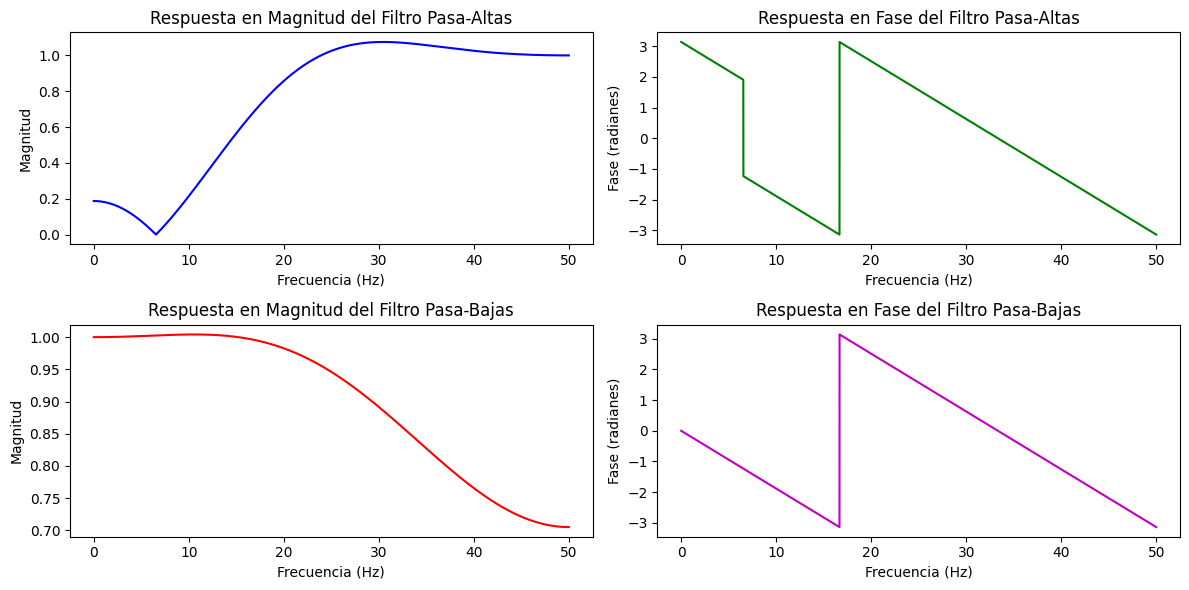

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Parámetros
Fs = 100  # Frecuencia de muestreo en Hz
nyquist = Fs / 2  # Frecuencia de Nyquist

# Filtro pasa-altas (15 Hz)
order_highpass = 6  # Orden del filtro pasa-altas
wn_highpass = 15 / nyquist  # Frecuencia de corte normalizada
highpass = signal.firwin(order_highpass + 1, wn_highpass, pass_zero='highpass', window='rectangular')  # Filtro pasa-altas

# Filtro pasa-bajas (45 Hz)
order_lowpass = 7  # Orden del filtro pasa-bajas
wn_lowpass = 45 / nyquist  # Frecuencia de corte normalizada
lowpass = signal.firwin(order_lowpass, wn_lowpass, pass_zero='lowpass', window='hann')  # Filtro pasa-bajas

# Respuesta en frecuencia filtro pasa-altas
w_highpass, h_highpass = signal.freqz(highpass, worN=8000)

# Respuesta en frecuencia filtro pasa-bajas
w_lowpass, h_lowpass = signal.freqz(lowpass, worN=8000)

# Graficar la respuesta en frecuencia (magnitud y fase) de ambos filtros
plt.figure(figsize=(12, 6))

# Magnitud pasa-altas
plt.subplot(2, 2, 1)
plt.plot(w_highpass / np.pi * nyquist, np.abs(h_highpass), 'b')
plt.title('Respuesta en Magnitud del Filtro Pasa-Altas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

# Fase pasa-altas
plt.subplot(2, 2, 2)
plt.plot(w_highpass / np.pi * nyquist, np.angle(h_highpass), 'g')
plt.title('Respuesta en Fase del Filtro Pasa-Altas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')

# Magnitud pasa-bajas
plt.subplot(2, 2, 3)
plt.plot(w_lowpass / np.pi * nyquist, np.abs(h_lowpass), 'r')
plt.title('Respuesta en Magnitud del Filtro Pasa-Bajas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

# Fase pasa-bajas
plt.subplot(2, 2, 4)
plt.plot(w_lowpass / np.pi * nyquist, np.angle(h_lowpass), 'm')
plt.title('Respuesta en Fase del Filtro Pasa-Bajas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')

plt.tight_layout()
plt.show()
